# degpy 
*degpy* is a python package for simplified interaction with Insel Lab degu electrophysiology data. The data is interfaced through `Session` objects, which contains meta-data about a given experimental session, as well as utilities to load data collected from the session. This is done so through `Terminal` objects, which contain data about a specific collection of data (LFP1.ncs, R1.ncs, etc). 

## Session Objects 

From the `session` module, import the `Session` class.

To instantiate a `Session` object, simply pass it a session directory (e.g. *080602/080602_ps17_160704/2016-07-04_13-22-47/*, here the session directory is sample-data/)

A session object is populated by the data contained in the Events.nev file, and contains the following attributes.

In [11]:
from degpy.session import Session

# For demo purposes, using a sample data directory
sess = Session('sample_data')

print("Session attributes: {}".format([x for x in dir(sess) if x[0] != "_"]))

Session attributes: ['data_files', 'events', 'events_file', 'get_terminal', 'header', 'records', 'session_path', 'timestamps']


#### Session attributes:
* `data_files`: list type, files in directory containing neuralynx ephys data (.ncs, .nse, .ntt files)
* `events`: array type, experiment exposure types, with index corresponding to index of `records` and `timestamps` attributes 
* `header`: dict type, neuralynx session meta-data 
* `records`: ndarray type, extraneous events data
* `session_path`: str type, path to session directory
* `timestamps`: int type, neuralynx timestamps for corresponding events 

In [2]:
sess

FileName: C:\CheetahData\080602_ps17_160704\2016-07-04_13-22-47\Events.nev
TimeOpened: Time Opened (m/d/y): 7/4/2016  (h:m:s.ms) 13:22:47.847
TimeOpened_dt: 2016-07-04 13:22:47.847000
TimeClosed: Time Closed (m/d/y): 7/4/2016  (h:m:s.ms) 15:42:19.545
TimeClosed_dt: 2016-07-04 15:42:19.545000
FileType: Event
FileVersion: 3.1.0
RecordSize: 184
CheetahRev: 5.6.3
AcqEntName: Events

In [3]:
sess.data_files

['E1.ncs', 'LFP1.ncs', 'R1.ncs']

In [4]:
sess.events

array(['Starting Recording', 'r1s', 'r1e', 'b1s', 'b1e', 'b2s', 'b2e',
       'b3s', 's1', 's1o', 's2', 's2o', 'b3e', 'b4s', 's1', 's1o', 's2',
       's2o', 'b4e', 'b5s', 's1', 's2', 's1o', 's2o', 'b5e', 'b6s', 's1',
       's2', 's1o', 's2o', 'b6e', 'b7s', 'o1', 'o1o', 'o2', 'o2o', 'b7e',
       'b8s', 'o1', 'o1o', 'o2', 'o2o', 'b8e', 'b9s', 'o1', 'o2', 'o1o',
       'o2o', 'b9e', 'b10s', 'o1', 'o2', 'o1o', 'o2o', 'b10e', 'b11s',
       'b11e', 'b12s', 'b12e', 'r2s', 'r2e', 'Stopping Recording'],
      dtype='<U18')

In [5]:
sess.timestamps

array([ 819292348,  820704626, 2357462785, 2460552980, 2647660347,
       2681133267, 2848031726, 2952754453, 2959492883, 3178598941,
       3230407375, 3414666506, 3420683097, 3447851238, 3468828139,
       3649999782, 3680383965, 3867330844, 3872533450, 3904740176,
       3921028078, 3941508854, 4124472201, 4147256544, 4153336928,
       4184184688, 4206761289, 4224312767, 4405597635, 4425166116,
       4430398038, 4513503120, 4522351043, 4692722532, 4697587436,
       4876038986, 4880694295, 4893318789, 4894920233, 5077130198,
       5080922159, 5265934075, 5269197231, 5289374539, 5293614543,
       5299486409, 5465105404, 5469121377, 5473825164, 5483505847,
       5485778551, 5488322253, 5656516283, 5659572495, 5663204921,
       5673285445, 5845176089, 5859240526, 6043596308, 6119870140,
       8116978666, 8120860287], dtype=uint64)

In [6]:
sess.header

{'FileName': 'C:\\CheetahData\\080602_ps17_160704\\2016-07-04_13-22-47\\Events.nev',
 'TimeOpened': 'Time Opened (m/d/y): 7/4/2016  (h:m:s.ms) 13:22:47.847',
 'TimeOpened_dt': datetime.datetime(2016, 7, 4, 13, 22, 47, 847000),
 'TimeClosed': 'Time Closed (m/d/y): 7/4/2016  (h:m:s.ms) 15:42:19.545',
 'TimeClosed_dt': datetime.datetime(2016, 7, 4, 15, 42, 19, 545000),
 'FileType': 'Event',
 'FileVersion': '3.1.0',
 'RecordSize': '184',
 'CheetahRev': '5.6.3',
 'AcqEntName': 'Events'}

In [7]:
sess.records

array([(0, 0, 0,  819292348, 0, 0, 0, 0, 0, [0, 0, 0, 0, 0, 0, 0, 0], b'Starting Recording'),
       (0, 0, 0,  820704626, 4, 0, 0, 0, 0, [0, 0, 0, 0, 0, 0, 0, 0], b'r1s'),
       (0, 0, 0, 2357462785, 4, 0, 0, 0, 0, [0, 0, 0, 0, 0, 0, 0, 0], b'r1e'),
       (0, 0, 0, 2460552980, 4, 0, 0, 0, 0, [0, 0, 0, 0, 0, 0, 0, 0], b'b1s'),
       (0, 0, 0, 2647660347, 4, 0, 0, 0, 0, [0, 0, 0, 0, 0, 0, 0, 0], b'b1e'),
       (0, 0, 0, 2681133267, 4, 0, 0, 0, 0, [0, 0, 0, 0, 0, 0, 0, 0], b'b2s'),
       (0, 0, 0, 2848031726, 4, 0, 0, 0, 0, [0, 0, 0, 0, 0, 0, 0, 0], b'b2e'),
       (0, 0, 0, 2952754453, 4, 0, 0, 0, 0, [0, 0, 0, 0, 0, 0, 0, 0], b'b3s'),
       (0, 0, 0, 2959492883, 4, 0, 0, 0, 0, [0, 0, 0, 0, 0, 0, 0, 0], b's1'),
       (0, 0, 0, 3178598941, 4, 0, 0, 0, 0, [0, 0, 0, 0, 0, 0, 0, 0], b's1o'),
       (0, 0, 0, 3230407375, 4, 0, 0, 0, 0, [0, 0, 0, 0, 0, 0, 0, 0], b's2'),
       (0, 0, 0, 3414666506, 4, 0, 0, 0, 0, [0, 0, 0, 0, 0, 0, 0, 0], b's2o'),
       (0, 0, 0, 3420683097, 4, 0, 0, 0

In [8]:
sess.timestamps

array([ 819292348,  820704626, 2357462785, 2460552980, 2647660347,
       2681133267, 2848031726, 2952754453, 2959492883, 3178598941,
       3230407375, 3414666506, 3420683097, 3447851238, 3468828139,
       3649999782, 3680383965, 3867330844, 3872533450, 3904740176,
       3921028078, 3941508854, 4124472201, 4147256544, 4153336928,
       4184184688, 4206761289, 4224312767, 4405597635, 4425166116,
       4430398038, 4513503120, 4522351043, 4692722532, 4697587436,
       4876038986, 4880694295, 4893318789, 4894920233, 5077130198,
       5080922159, 5265934075, 5269197231, 5289374539, 5293614543,
       5299486409, 5465105404, 5469121377, 5473825164, 5483505847,
       5485778551, 5488322253, 5656516283, 5659572495, 5663204921,
       5673285445, 5845176089, 5859240526, 6043596308, 6119870140,
       8116978666, 8120860287], dtype=uint64)

To access data collected from a given session, the method `.get_terminal()` accepts a filename contained in `Session.data_files` and returns a custom Terminal object.

#### Session methods
* `get_terminal`: Terminal type, custom abstraction of singular data collection (i.e. one .ncs file)

## Terminal Objects 

Using a `Session` object as an interface, you can retrieve experimental data abstracted as a `Terminal` object. A `Terminal` object contains ephys data as well as meta data about the session.

In [17]:
lfp1 = sess.get_terminal('LFP1.ncs')

print("Session attributes: {}".format([x for x in dir(lfp1) if x[0] != "_"]))

Session attributes: ['bandpower', 'bandpower_splits', 'channel_number', 'data', 'data_units', 'event_timestamps', 'events', 'file_path', 'header', 'raw_header', 'sampling_rate', 'timestamp', 'timestamp_expanded']


#### Terminal Attributes 
* `channel_number`: Neuralynx channel number used for particular record
* `data`: Data points for entire session
* `data_units`: Units for data (uV, mV, V)
* `event_timestamps`: Timestamps of exposure start/end times for corresponding events
* `events`: List of events corresponding to event timestamps
* `file_path`: Absolute file path to data record
* `header`: Neuralynx header for given data file
* `raw_header`: Unstructured Neuralynx header for given data file
* `sampling_rate`: Number of data points collected per second
* `timestamp`: Timestamp for every 512 data points (per Neuralynx convention)
* `timestamp_expanded`: Timestamp corresponding to each data point

In [23]:
len(lfp1.data)

14855168

In [18]:
lfp1.channel_number

7

In [19]:
lfp1.data

array([-41.26102604, -44.3739141 , -43.76354389, ...,  95.15671538,
        97.23197409,  99.06308471])

In [13]:
lfp1.data_units

'µV'

In [14]:
lfp1.event_timestamps

array([ 819292348,  820704626, 2357462785, 2460552980, 2647660347,
       2681133267, 2848031726, 2952754453, 2959492883, 3178598941,
       3230407375, 3414666506, 3420683097, 3447851238, 3468828139,
       3649999782, 3680383965, 3867330844, 3872533450, 3904740176,
       3921028078, 3941508854, 4124472201, 4147256544, 4153336928,
       4184184688, 4206761289, 4224312767, 4405597635, 4425166116,
       4430398038, 4513503120, 4522351043, 4692722532, 4697587436,
       4876038986, 4880694295, 4893318789, 4894920233, 5077130198,
       5080922159, 5265934075, 5269197231, 5289374539, 5293614543,
       5299486409, 5465105404, 5469121377, 5473825164, 5483505847,
       5485778551, 5488322253, 5656516283, 5659572495, 5663204921,
       5673285445, 5845176089, 5859240526, 6043596308, 6119870140,
       8116978666, 8120860287], dtype=uint64)

In [15]:
lfp1.events

array(['Starting Recording', 'r1s', 'r1e', 'b1s', 'b1e', 'b2s', 'b2e',
       'b3s', 's1', 's1o', 's2', 's2o', 'b3e', 'b4s', 's1', 's1o', 's2',
       's2o', 'b4e', 'b5s', 's1', 's2', 's1o', 's2o', 'b5e', 'b6s', 's1',
       's2', 's1o', 's2o', 'b6e', 'b7s', 'o1', 'o1o', 'o2', 'o2o', 'b7e',
       'b8s', 'o1', 'o1o', 'o2', 'o2o', 'b8e', 'b9s', 'o1', 'o2', 'o1o',
       'o2o', 'b9e', 'b10s', 'o1', 'o2', 'o1o', 'o2o', 'b10e', 'b11s',
       'b11e', 'b12s', 'b12e', 'r2s', 'r2e', 'Stopping Recording'],
      dtype='<U18')

In [16]:
lfp1.file_path

'/Users/Max/Dropbox/Notebook/2019/degpy/sample-data/LFP1.ncs'

In [17]:
lfp1.header

{'FileName': 'C:\\CheetahData\\080602_ps17_160704\\2016-07-04_13-22-47\\LFP1.ncs',
 'TimeOpened': 'Time Opened (m/d/y): 7/4/2016  (h:m:s.ms) 13:22:47.905',
 'TimeOpened_dt': datetime.datetime(2016, 7, 4, 13, 22, 47, 905000),
 'TimeClosed': 'Time Closed (m/d/y): 7/4/2016  (h:m:s.ms) 15:42:17.343',
 'TimeClosed_dt': datetime.datetime(2016, 7, 4, 15, 42, 17, 343000),
 'FileType': 'CSC',
 'FileVersion': '3.3.0',
 'RecordSize': '1044',
 'CheetahRev': '5.6.3',
 'HardwareSubSystemName': 'AcqSystem1',
 'HardwareSubSystemType': 'DigitalLynx',
 'SamplingFrequency': '2034.75',
 'ADMaxValue': '32767',
 'ADBitVolts': '0.000000061037020770982053',
 'AcqEntName': 'LFP1',
 'NumADChannels': '1',
 'ADChannel': '43',
 'InputRange': '2000',
 'InputInverted': 'True',
 'DSPLowCutFilterEnabled': 'True',
 'DspLowCutFrequency': '0.3',
 'DspLowCutNumTaps': '0',
 'DspLowCutFilterType': 'DCO',
 'DSPHighCutFilterEnabled': 'True',
 'DspHighCutFrequency': '500',
 'DspHighCutNumTaps': '64',
 'DspHighCutFilterType': '

In [18]:
lfp1.raw_header

b'######## Neuralynx Data File Header\r\n## File Name C:\\CheetahData\\080602_ps17_160704\\2016-07-04_13-22-47\\LFP1.ncs\r\n## Time Opened (m/d/y): 7/4/2016  (h:m:s.ms) 13:22:47.905\r\n## Time Closed (m/d/y): 7/4/2016  (h:m:s.ms) 15:42:17.343\r\n\r\n-FileType CSC\r\n-FileVersion 3.3.0\r\n-RecordSize 1044\r\n\r\n-CheetahRev 5.6.3 \r\n\r\n-HardwareSubSystemName AcqSystem1\r\n-HardwareSubSystemType DigitalLynx\r\n-SamplingFrequency 2034.75\r\n-ADMaxValue 32767\r\n-ADBitVolts 0.000000061037020770982053\r\n\r\n-AcqEntName LFP1\r\n-NumADChannels 1\r\n-ADChannel 43\r\n-InputRange 2000\r\n-InputInverted True\r\n\r\n-DSPLowCutFilterEnabled True\r\n-DspLowCutFrequency 0.3\r\n-DspLowCutNumTaps 0\r\n-DspLowCutFilterType DCO\r\n-DSPHighCutFilterEnabled True\r\n-DspHighCutFrequency 500\r\n-DspHighCutNumTaps 64\r\n-DspHighCutFilterType FIR\r\n-DspDelayCompensation Disabled\r\n-DspFilterDelay_\xb5s 968\r\n'

In [20]:
lfp1.sampling_rate # Given in Hz

2034

In [21]:
lfp1.timestamp

array([ 819292809,  819544467,  819796125, ..., 8120150010, 8120401668,
       8120653326], dtype=uint64)

### Terminal Methods
`bandpower` : Returns bandpower of given exposure
`bandpower_splits`: Returns bandpower of every exposure in session

In [4]:
bp_splits = lfp1.bandpower_splits([40, 80])

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

bp_splits_pd = pd.Series(bp_splits)

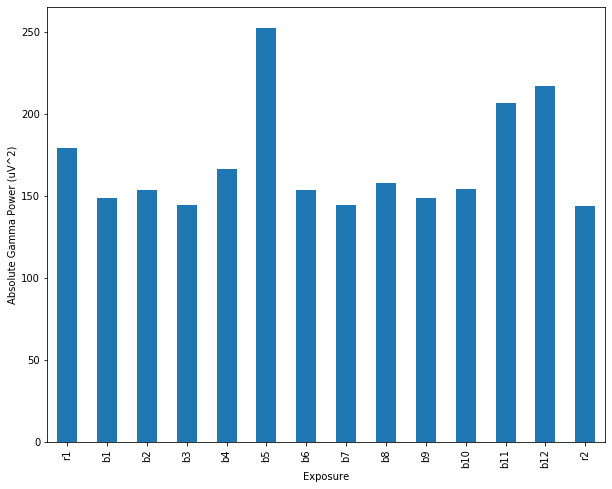

In [16]:
fig, ax = plt.subplots(figsize=(10, 8))
bp_splits_pd.plot(kind='bar', ax=ax);
ax.set_ylabel('Absolute Gamma Power (uV^2)')
ax.set_xlabel('Exposure');